In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
path = (r'C:\\Users\\ajifo\\Machine learning project\\Walmart sales forecast\\data')

In [33]:
train_data = pd.read_csv (f'{path}\\Clean_train_data.csv')

In [34]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,9


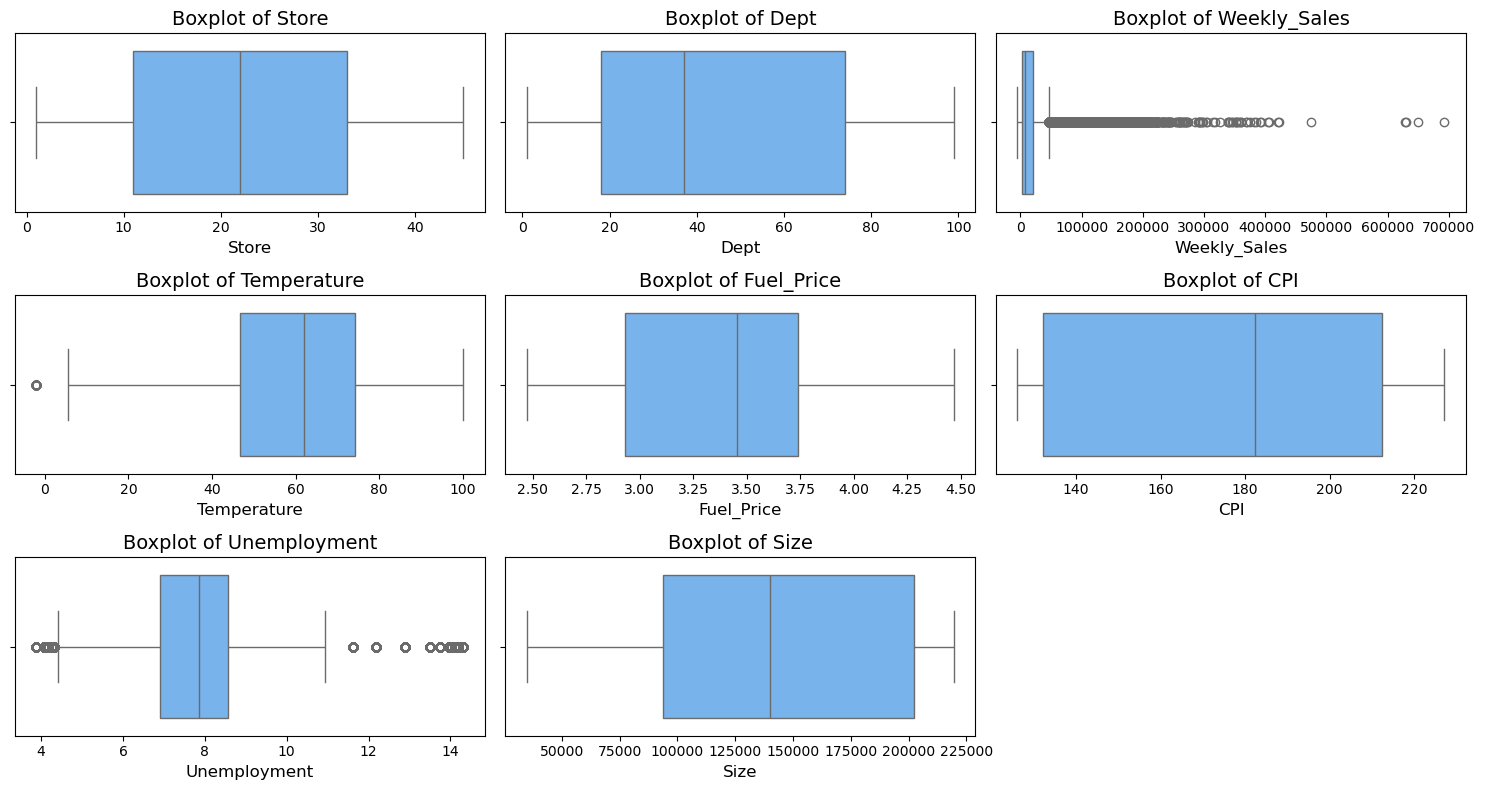

In [35]:
# Drop unwanted time-related columns
cols_to_drop = ['Year', 'Week', 'Month']
df = train_data.drop(columns=cols_to_drop, errors='ignore')

# Checking for outliers using visualization
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)   # Adjust grid size based on your number of columns
    sns.boxplot(x=df[col], color='#66b3ff')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


The outliers are important in this dataset because it holds valuable information.

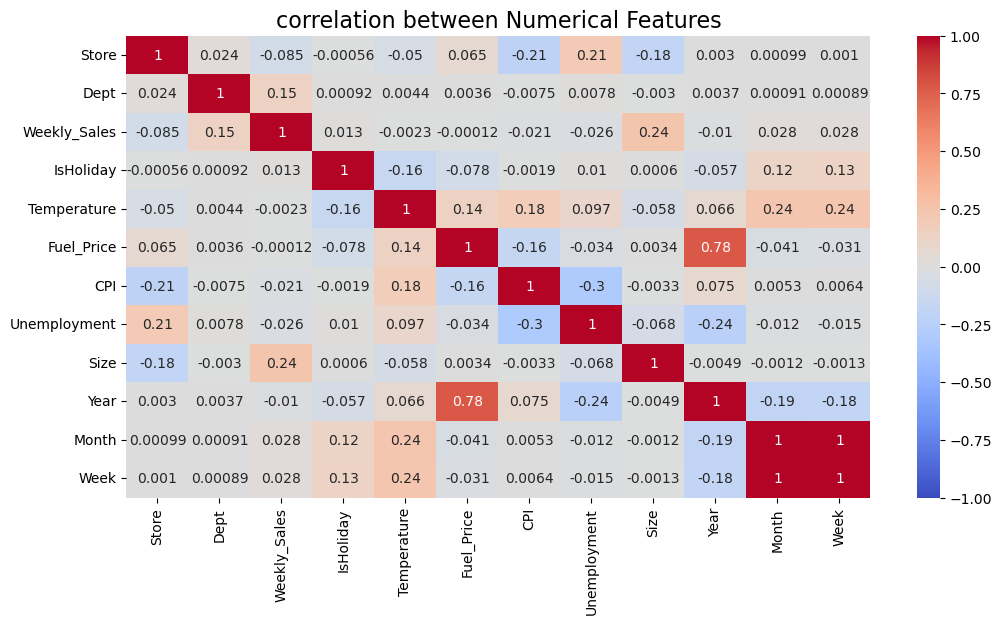

In [36]:
# Checking for correlation 

corr = train_data.corr(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm',  vmin=-1, vmax=1)
plt.title("correlation between Numerical Features", fontsize=16)
plt.show()

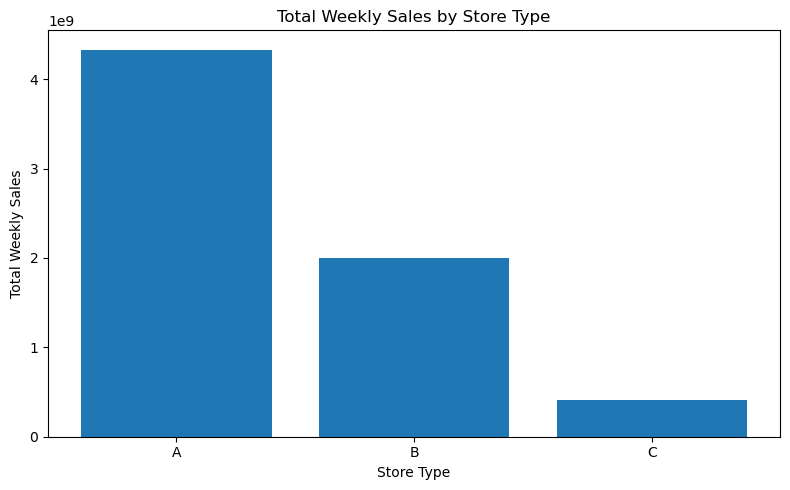

In [37]:
store_totals = train_data.groupby('Type')['Weekly_Sales'].sum()

plt.figure(figsize=(8,5))
plt.bar(store_totals.index, store_totals.values)
plt.xlabel("Store Type")
plt.ylabel("Total Weekly Sales")
plt.title("Total Weekly Sales by Store Type")
plt.tight_layout()
plt.show()

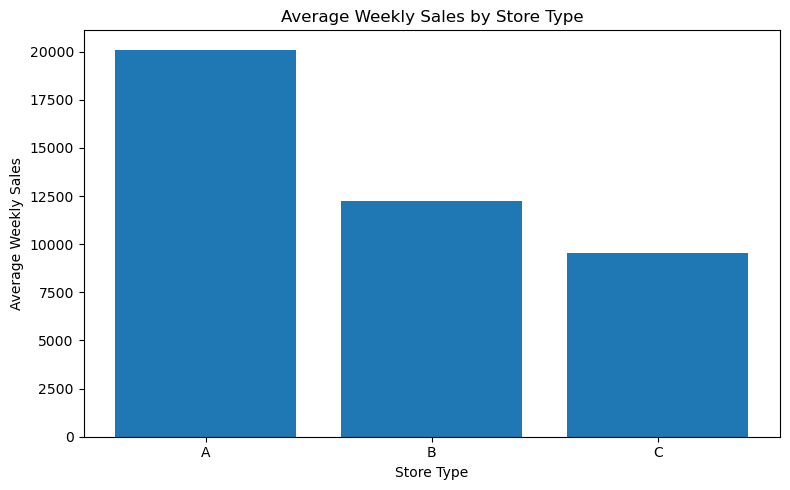

In [38]:
store_average = train_data.groupby('Type')['Weekly_Sales'].mean()

plt.figure(figsize=(8,5))
plt.bar(store_average.index, store_average.values)
plt.xlabel("Store Type")
plt.ylabel("Average Weekly Sales")
plt.title("Average Weekly Sales by Store Type")
plt.tight_layout()
plt.show()

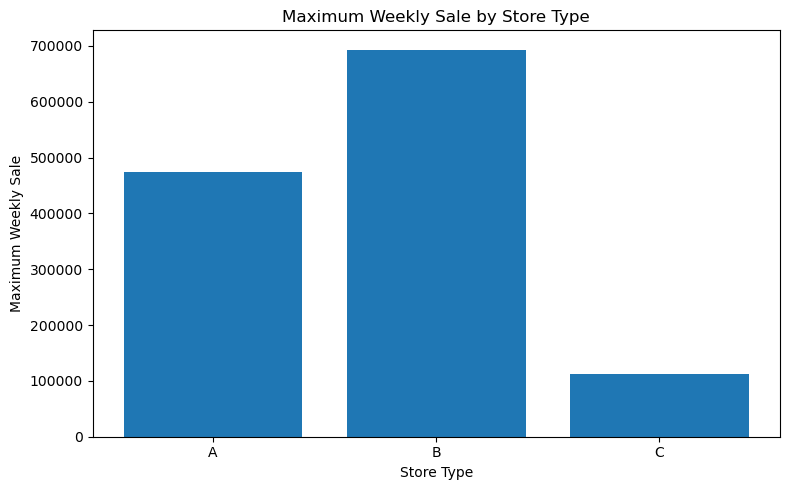

In [39]:
Store_Max = train_data.groupby('Type')['Weekly_Sales'].max()

plt.figure(figsize=(8,5))
plt.bar(Store_Max.index, Store_Max.values)
plt.xlabel("Store Type")
plt.ylabel("Maximum Weekly Sale")
plt.title("Maximum Weekly Sale by Store Type")
plt.tight_layout()
plt.show()

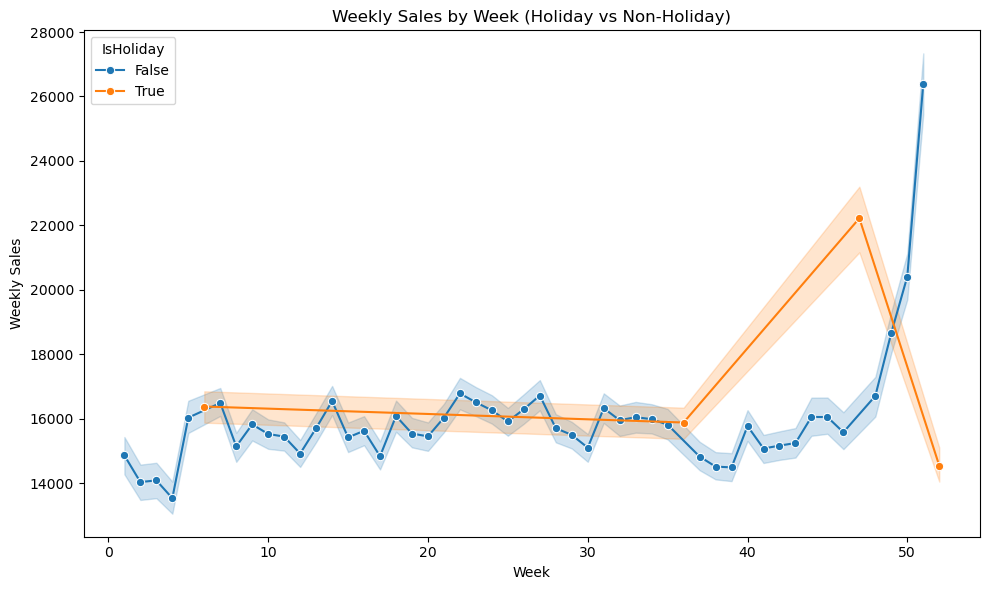

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=train_data,
    x="Week",
    y="Weekly_Sales",
    hue="IsHoliday",
    marker="o"
)

plt.title("Weekly Sales by Week (Holiday vs Non-Holiday)")
plt.xlabel("Week")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

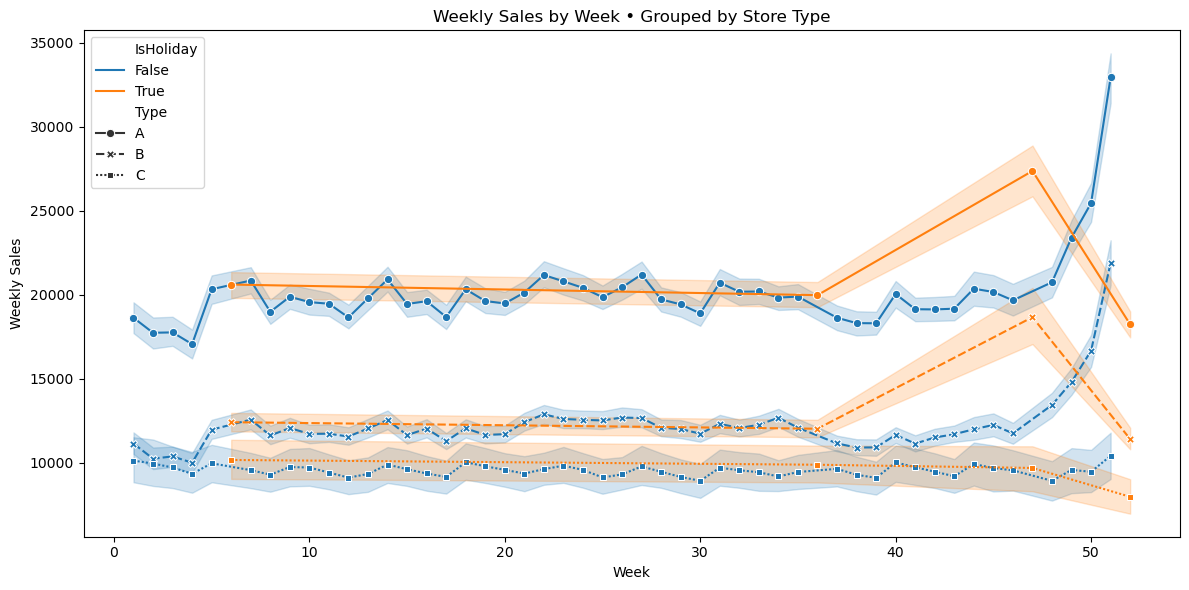

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=train_data,
    x="Week",
    y="Weekly_Sales",
    hue="IsHoliday",
    style="Type",       
    markers=True
)

plt.title("Weekly Sales by Week • Grouped by Store Type")
plt.xlabel("Week")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

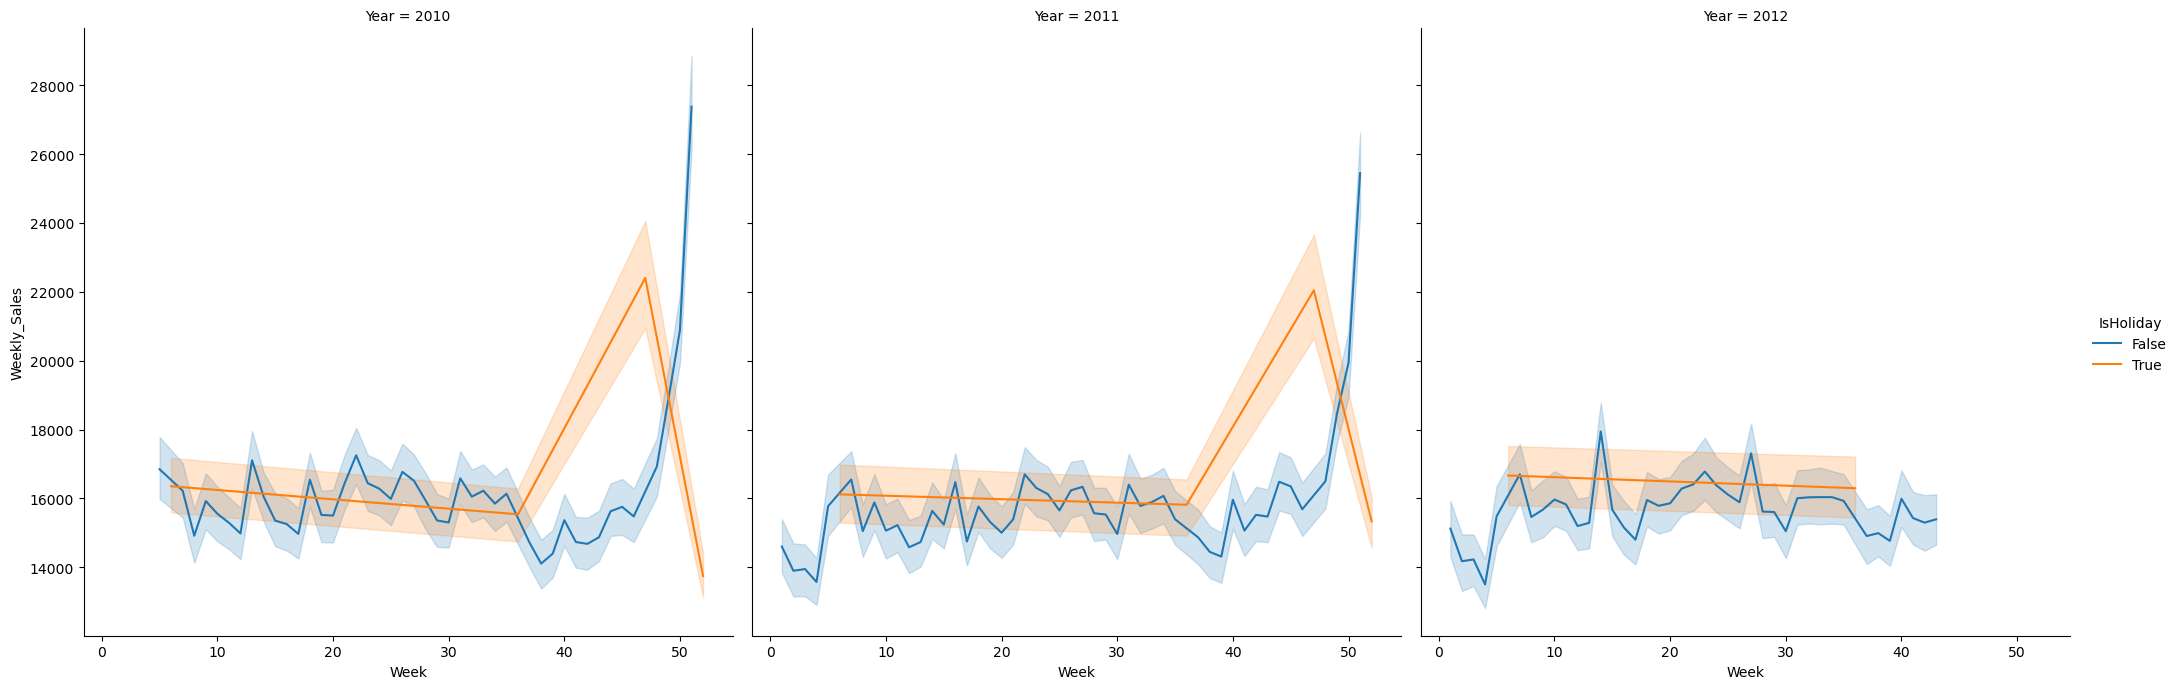

In [42]:
sns.relplot(
    data=train_data,
    x="Week",
    y="Weekly_Sales",
    hue="IsHoliday",
    col="Year",
    kind="line",
    height=7,
    aspect=1
    )

This plot shows that yearly sales follow a consistent pattern during both holiday and non-holiday periods. It suggests that an effective stocking strategy could significantly boost sales during holidays compared to previous years.

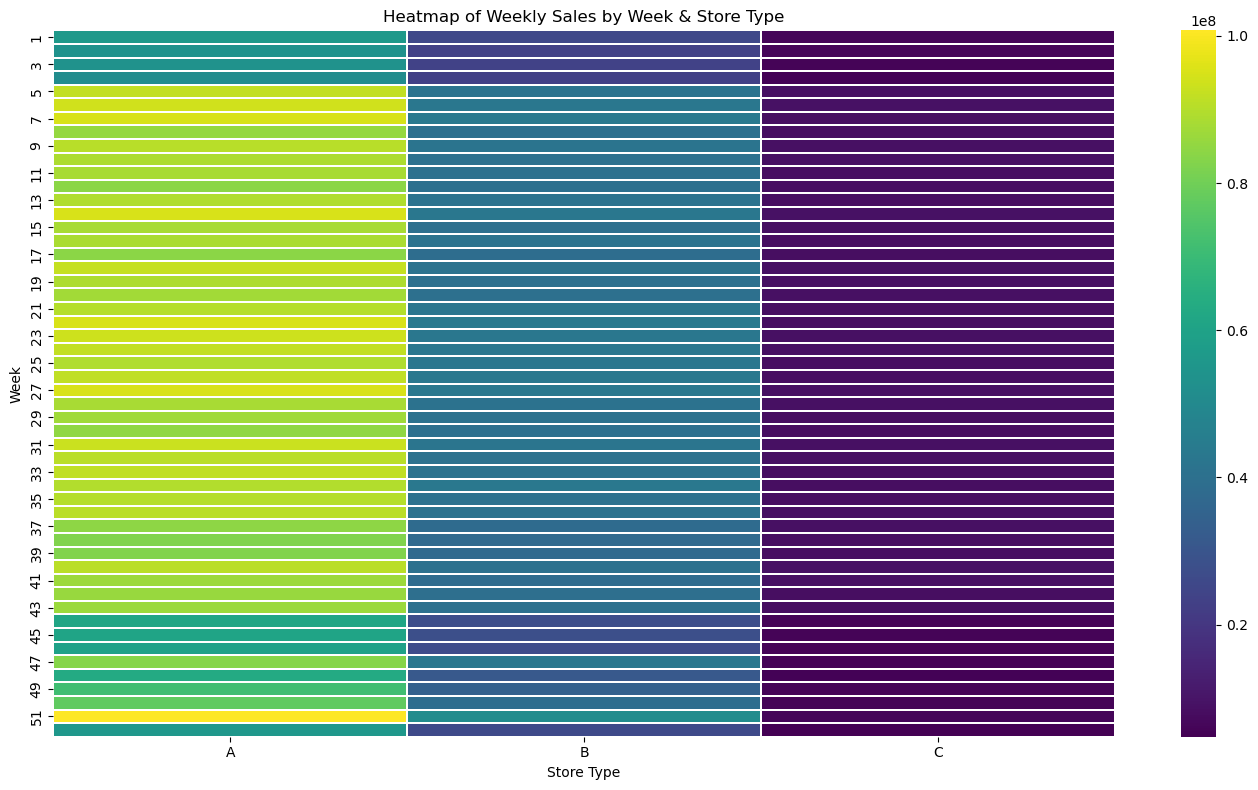

In [43]:
heatmap_data = train_data.pivot_table(
    index="Week",
    columns="Type",
    values="Weekly_Sales",
    aggfunc="sum"
)

# heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap="viridis",   
    linewidths=0.3
)

plt.title("Heatmap of Weekly Sales by Week & Store Type")
plt.xlabel("Store Type")
plt.ylabel("Week")
plt.tight_layout()
plt.show()

This HeatMap clearly shows and backed the line graphs that Store C has been performing so poor in sales that Store B. Store A start with a moderate sales from the start of the week and then scaled up before the end of each year. But drastically reduced in the last week of the year simply because the holiday is coming to an end.

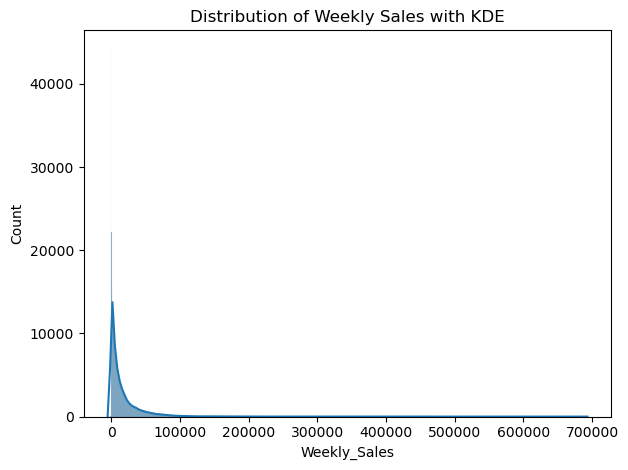

In [44]:
sns.histplot(x=train_data['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales with KDE')

plt.tight_layout()
plt.show()

In [45]:
train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week'],
      dtype='object')

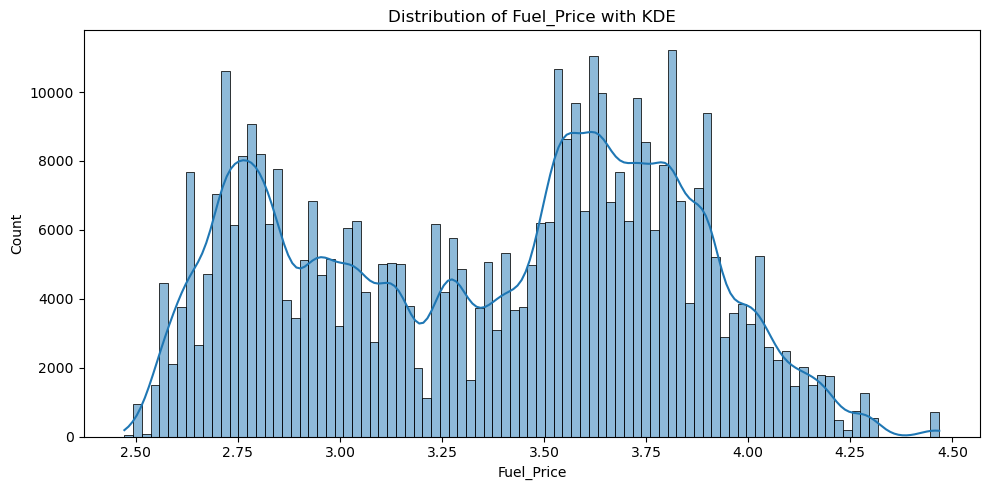

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(x=train_data['Fuel_Price'], kde=True)
plt.title('Distribution of Fuel_Price with KDE')

plt.tight_layout()
plt.show()

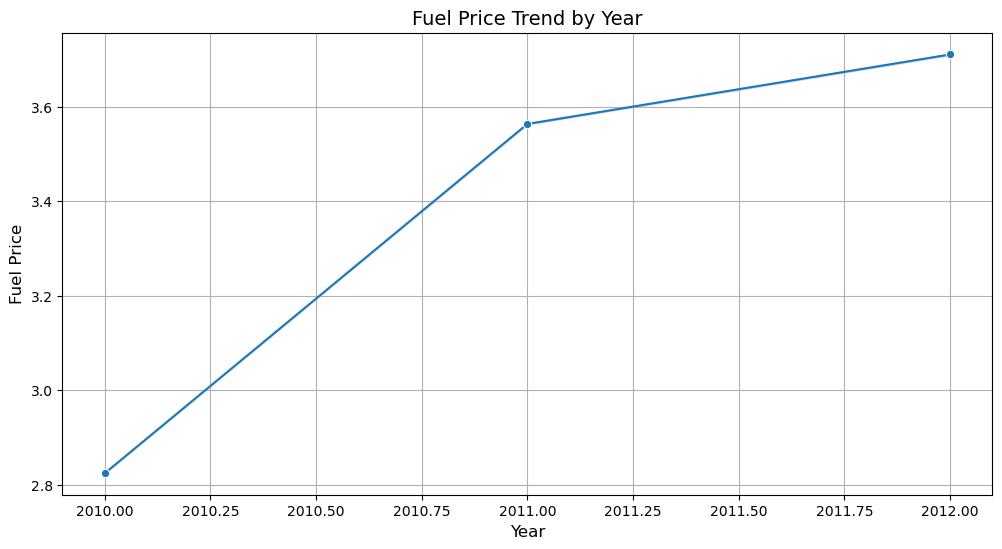

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(data=train_data, x='Year', y='Fuel_Price', marker='o')

plt.title("Fuel Price Trend by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Fuel Price", fontsize=12)
plt.grid(True)
plt.show()